# A basic pipeline

This example shows a basic pipeline that reads some frames of a video and writes them in an output video.

In [1]:
%load_ext autoreload
%autoreload 2

For this example we will create a pipeline with only two components:
- A source that reads from a video file.
- A sink that writes to a video file.

In [2]:
from videoanalytics.pipeline import Pipeline
from videoanalytics.pipeline.sources import VideoReader
from videoanalytics.pipeline.sinks import VideoWriter

Note: the video used in this example was downloaded from [youtube](https://www.youtube.com/watch?v=WgCe0tMO4lA).

In [3]:
DATA_PATH = "../data"

# Input
INPUT_VIDEO = DATA_PATH+"/input/test_video.mp4"
START_FRAME = 0
MAX_FRAMES = 100

In [4]:
%%HTML
<div style="text-align: center">
    <video width="600" height="400" controls>
      <source src="../data/input/test_video.mp4" type="video/mp4">
    </video>
</div>

Path for output video.

In [5]:
OUTPUT_VIDEO = DATA_PATH+ "/output/test_output.avi"

## Typical workflow

The following steps illustrate the typical workflow for definining and executing a  pipeline.

Step 1. Create the global context used by components to share data.

In [6]:
context = {}

Step 2. Create the pipeline and add each component.

In [7]:
pipeline = Pipeline()

In [8]:
pipeline.add_component( VideoReader( "input",context,
                 video_path=INPUT_VIDEO,
                 start_frame=START_FRAME,
                 max_frames=MAX_FRAMES))

In [9]:
pipeline.add_component(VideoWriter("writer",context,filename=OUTPUT_VIDEO))

Step 3. Define the order of execution. Each tuple (A,B) indicates that B has to be executed after A.

In [10]:
pipeline.set_connections([
    ("input", "writer")
])

Step 4 (optional). Remove isolated components and plot the graph.

In [11]:
pipeline.optimize()

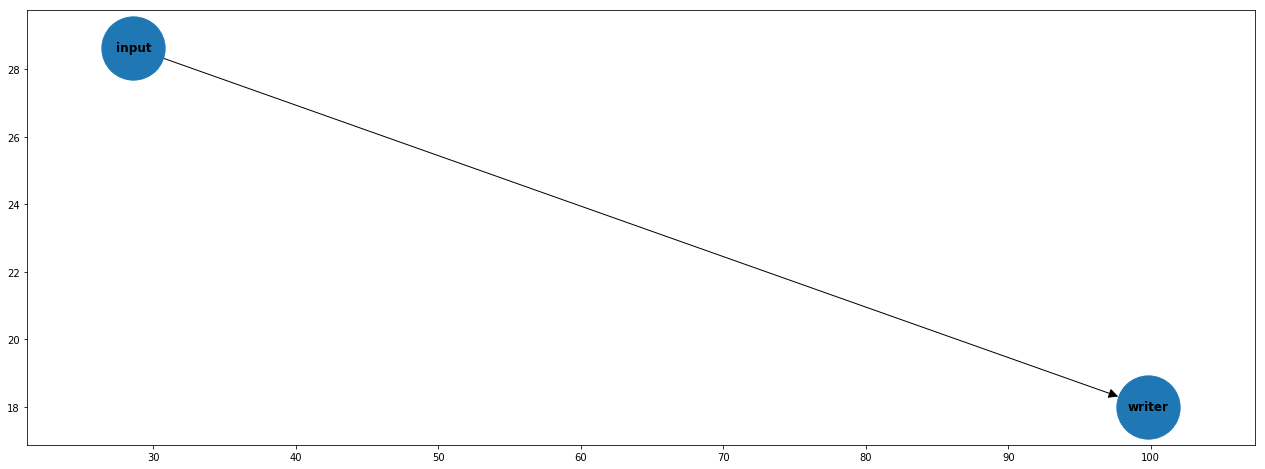

In [12]:
import matplotlib.pyplot as plt

fig,axes = plt.subplots(1,1,figsize=(22,8))
pipeline.plot(ax=axes)

Step 5. Execute the pipeline.

In [13]:
pipeline.execute()
print("Total execution time [s]:", pipeline.get_total_execution_time())

  0%|          | 0/100.0 [00:00<?, ?it/s]

Total execution time [s]: 2.5278763639998942


Step 6 (optional). Report the execution times for each component. Times are expressed in seconds.

In [14]:
import pandas as pd

metrics_df = pd.DataFrame.from_dict(pipeline.get_metrics(), orient='index',columns=["time"])
metrics_df

,time
input_avg_dt,0.005694
writer_avg_dt,0.019278


Display the output video. 

Note: currently XVID format is not supported by jupyter.

In [15]:
%%HTML
<div style="text-align: center">
    <video width="600" height="400" controls>
      <source src="../data/output/test_output.avi" type="video/avi">
    </video>
</div>